In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stat

In [4]:
import nltk
nltk.data.path.append("~/nltk_data")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Innocent\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
!python -m textblob.download_corpora

C:\Users\Innocent\anaconda3\python.exe: Error while finding module specification for 'textblob.download_corpora' (ModuleNotFoundError: No module named 'textblob')


In [6]:
import warnings
warnings.filterwarnings("ignore")

## Basic Feature Extraction

In [7]:
train = pd.read_csv('C:/Users/Innocent/Downloads/stock_tweets.csv/stock_tweets.csv')

In [8]:
# Replace 'your_dataset.csv' with the actual path to your dataset file
dataset = pd.read_csv('C:/Users/Innocent/Downloads/stock_tweets.csv/stock_tweets.csv')

In [9]:
train.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [10]:
import pandas as pd
# Assuming you have a DataFrame named 'train'
# and you want to drop rows with values other than 'TSLA' in the 'Stock Name' column

# Filter rows where 'Stock Name' is 'TSLA'
train = train[train['Stock Name'] == 'TSLA']

# Now, 'filtered_train' contains only rows with 'TSLA' in the 'Stock Name' column

In [11]:
train.shape

(37422, 4)

## Handling User Mentions and Hashtags:

In [12]:
import re

# Define functions to extract user mentions and hashtags
def extract_user_mentions(text):
    # Use regex to find user mentions (e.g., @username)
    user_mentions = re.findall(r'@(\w+)', text)
    return user_mentions

def extract_hashtags(text):
    # Use regex to find hashtags (e.g., #topic)
    hashtags = re.findall(r'#(\w+)', text)
    return hashtags

# Apply the functions to the 'body' column
train['user_mentions'] = train['Tweet'].apply(extract_user_mentions)
train['hashtags'] = train['Tweet'].apply(extract_hashtags)

In [13]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[]
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",[],[]
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",[],[]
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[]
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[]


## Expand Contractions

In [14]:
# Define a dictionary of common contractions and their expansions
contraction_dict = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he's": "he is",
    "he'll": "he will",
    "he'd": "he would",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "mustn't": "must not",
    "shan't": "shall not",
    "she's": "she is",
    "she'll": "she will",
    "she'd": "she would",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they're": "they are",
    "they'll": "they will",
    "they'd": "they would",
    "wasn't": "was not",
    "we're": "we are",
    "we'll": "we will",
    "we'd": "we would",
    "weren't": "were not",
    "what's": "what is",
    "won't": "will not",
    "wouldn't": "would not",
    "you're": "you are",
    "you'll": "you will",
    "you'd": "you would",
    # Add more contractions and expansions as needed
}

# Define a function to expand contractions using the dictionary
def expand_contractions_manual(text):
    words = text.split()
    expanded_words = [contraction_dict[word] if word in contraction_dict else word for word in words]
    return ' '.join(expanded_words)

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(expand_contractions_manual)

In [15]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[]
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",[],[]
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",[],[]
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[]
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[]


## Lower Case

In [16]:
train['Tweet'] = train['Tweet'].str.lower()

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37422 entries, 0 to 37421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           37422 non-null  object
 1   Tweet          37422 non-null  object
 2   Stock Name     37422 non-null  object
 3   Company Name   37422 non-null  object
 4   user_mentions  37422 non-null  object
 5   hashtags       37422 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [18]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
13509,2022-04-28 21:10:15+00:00,tesla guiding growing at least +50% yoy for ma...,TSLA,"Tesla, Inc.",[],[]
6930,2022-07-09 10:54:48+00:00,called it instantly $tsla $tslaq. i am no expe...,TSLA,"Tesla, Inc.",[elonmusk],[]
16585,2022-04-05 01:34:02+00:00,"elon tired of just squeezing $tsla shorts, he’...",TSLA,"Tesla, Inc.",[],[]
22815,2022-01-27 16:01:11+00:00,added $tsla $82k in premiums. breakeven is $87...,TSLA,"Tesla, Inc.",[],[]
16077,2022-04-08 13:56:40+00:00,nasdaq and tech is getting wrecked today. damn...,TSLA,"Tesla, Inc.",[],[]
16151,2022-04-08 04:32:09+00:00,elon musk liked a tweet from dogedesigner #dog...,TSLA,"Tesla, Inc.",[],"[Dogecoin, Tesla]"
37074,2021-10-03 20:33:32+00:00,$tsla bull case: while the majority of the aut...,TSLA,"Tesla, Inc.",[],"[GigaBerlin, GigaAustin]"
28372,2021-12-13 20:52:20+00:00,@futurefund any pm overweight $tsla since nov ...,TSLA,"Tesla, Inc.",[futurefund],[]
34138,2021-10-26 15:36:08+00:00,"last alert, retirement portfolio investors ple...",TSLA,"Tesla, Inc.",[],[]
36630,2021-10-08 02:21:55+00:00,tesla china increase the range (cltc) for mic ...,TSLA,"Tesla, Inc.",[],"[Tesla, TeslaChina, Model3Performance, 特斯拉, 中国]"


## Removing punctuations

In [19]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove punctuation from a text string
def remove_punctuation(text):
    # Use regex to remove all non-alphanumeric characters (including punctuation)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_punctuation)

In [20]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
26085,2022-01-03 09:17:11+00:00,tsla tesla delivered 308600 vehicles in q4 vs ...,TSLA,"Tesla, Inc.",[],[]
7376,2022-07-03 11:14:21+00:00,based on how all the media is trying to make t...,TSLA,"Tesla, Inc.",[],[]
10161,2022-05-28 04:26:02+00:00,you guys if you have not been to the tesla ket...,TSLA,"Tesla, Inc.","[tesla, elonmusk]",[]
7166,2022-07-06 15:37:37+00:00,tsla has just released their update on their s...,TSLA,"Tesla, Inc.",[],[]
11424,2022-05-19 01:57:22+00:00,tesla model y and model 3 outsell all other ca...,TSLA,"Tesla, Inc.","[elonmusk, tesla]",[]
6943,2022-07-09 01:51:44+00:00,27 days tsla httpstcoqvqcjuu0mr,TSLA,"Tesla, Inc.",[],[]
23068,2022-01-26 21:30:00+00:00,tsla says they have enough cash and liquidity ...,TSLA,"Tesla, Inc.",[],[]
13862,2022-04-26 15:52:31+00:00,tsla literally destroyed earnings estimates an...,TSLA,"Tesla, Inc.",[],[]
9135,2022-06-09 03:25:07+00:00,teslas tsla share of global electric vehicle s...,TSLA,"Tesla, Inc.",[],[]
19012,2022-03-11 17:51:43+00:00,it seems 800 is a major resistance level for t...,TSLA,"Tesla, Inc.",[],[]


## Removing Special Characters

In [21]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove special characters from a text string
def remove_special_characters(text):
    # Use regex to remove all non-alphanumeric characters (including special characters)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_special_characters)

In [22]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
31914,2021-11-09 21:42:46+00:00,if elonmusk hasnt yet sold his 171m shares yet...,TSLA,"Tesla, Inc.",[elonmusk],[]
34695,2021-10-25 12:06:54+00:00,hertz confirms deal to hire tom brady to showc...,TSLA,"Tesla, Inc.",[TomBrady],[]
6274,2022-07-19 01:42:04+00:00,everythings a joke to this guy even layoffs at...,TSLA,"Tesla, Inc.",[],[]
20903,2022-02-16 09:41:12+00:00,tsla 03 to 925 premkt equities flat spx 01 ndx...,TSLA,"Tesla, Inc.",[],[]
3084,2022-08-20 19:11:33+00:00,finished the walnut cybertruck for my nephew ...,TSLA,"Tesla, Inc.","[Tesla, elonmusk]",[]
10494,2022-05-24 22:41:40+00:00,why do i invest in tsla do i have blind faith ...,TSLA,"Tesla, Inc.",[],[]
18302,2022-03-21 15:23:51+00:00,tesla moving higher as it dominates the ev wor...,TSLA,"Tesla, Inc.",[],[]
24389,2022-01-15 18:08:37+00:00,elonmusk sawyermerritt tesla safest cars on th...,TSLA,"Tesla, Inc.","[elonmusk, SawyerMerritt, Tesla]",[]
37415,2021-09-30 04:01:09+00:00,if humans could tell the difference between li...,TSLA,"Tesla, Inc.",[],[]
2780,2022-08-24 11:43:41+00:00,rest of year is shaping up nicely tsla httpstc...,TSLA,"Tesla, Inc.",[],[]


## Removing URLs

In [23]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove URLs from a text string
def remove_urls(text):
    # Use regex to remove URLs from the text
    text = re.sub(r'http\S+|www.\S+', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_urls)

## Removing words and digits containing digits

In [24]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove words and digits containing digits from a text string
def remove_words_with_digits(text):
    # Use regex to remove words and digits containing digits from the text
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_words_with_digits)

In [25]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
10451,2022-05-25 12:23:27+00:00,institutl shs would be ok with tsla charging r...,TSLA,"Tesla, Inc.",[],[]
10895,2022-05-21 13:55:23+00:00,bitswifttech techau tesla if you can find it ...,TSLA,"Tesla, Inc.","[bitswift_tech, techAU, Mjarchie1, Tesla]",[]
27867,2021-12-18 14:12:15+00:00,the tesla model x can make you feel like youre...,TSLA,"Tesla, Inc.",[Tesla],[]
31968,2021-11-09 18:45:43+00:00,my tesla is now safer after an ota software up...,TSLA,"Tesla, Inc.","[Tesla, elonmusk]",[]
1091,2022-09-15 04:37:46+00:00,i honestly have no idea how tesla managed to k...,TSLA,"Tesla, Inc.","[tesla, elonmusk]",[]
17742,2022-03-25 20:31:04+00:00,since growth stocks bottomed on one day befor...,TSLA,"Tesla, Inc.",[],[]
32391,2021-11-07 14:44:34+00:00,hey jeffbezos amazon amazonin you need to thin...,TSLA,"Tesla, Inc.","[JeffBezos, amazon, amazonIN, Tesla, dogecoin,...","[SHIB, shiba, SHIBARMY]"
15951,2022-04-09 19:08:55+00:00,final farewell to tesla gigatexas thanks for l...,TSLA,"Tesla, Inc.","[Tesla, elonmusk, woodhaus2]",[GigaTexas]
28077,2021-12-16 14:40:45+00:00,if you blinked you missed the only rally tsla ...,TSLA,"Tesla, Inc.",[],[]
22062,2022-02-02 09:35:54+00:00,stevenmarkryan stevemarkryan the other thing ...,TSLA,"Tesla, Inc.","[stevenmarkryan, stevemarkryan]",[]


# Tokenization

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Innocent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Assuming 'train' is your DataFrame and 'body' is the text column to tokenize
train['tweet_tokens'] = train['Tweet'].apply(word_tokenize)

In [28]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens
17275,2022-03-29 16:38:02+00:00,aapl and tsla both with evening star potential...,TSLA,"Tesla, Inc.",[],[],"[aapl, and, tsla, both, with, evening, star, p..."
14347,2022-04-22 16:23:34+00:00,tsla stock has the most options traded of any ...,TSLA,"Tesla, Inc.",[],[],"[tsla, stock, has, the, most, options, traded,..."
30830,2021-11-18 11:21:51+00:00,tsla to premkt as equities rallied spx ndx ...,TSLA,"Tesla, Inc.",[],[],"[tsla, to, premkt, as, equities, rallied, spx,..."
10000,2022-05-31 10:17:05+00:00,idra group released this video an hour ago thi...,TSLA,"Tesla, Inc.",[],"[cybertruck, Tesla]","[idra, group, released, this, video, an, hour,..."
20121,2022-02-25 01:15:01+00:00,trade plan for lottofriday spx pt bounce tod...,TSLA,"Tesla, Inc.",[],[LottoFriday],"[trade, plan, for, lottofriday, spx, pt, bounc..."
22647,2022-01-28 03:45:09+00:00,waking up early to buy some more tsla,TSLA,"Tesla, Inc.",[],[],"[waking, up, early, to, buy, some, more, tsla]"
11482,2022-05-18 17:21:06+00:00,car accident deaths reach an all time high wit...,TSLA,"Tesla, Inc.",[PeteButtigieg],[tesla],"[car, accident, deaths, reach, an, all, time, ..."
28758,2021-12-09 17:51:51+00:00,ford ceo jim farley speaking to cnbcs jim cram...,TSLA,"Tesla, Inc.","[Ford, CNBC, Tesla]",[],"[ford, ceo, jim, farley, speaking, to, cnbcs, ..."
16943,2022-04-01 23:41:03+00:00,tsla is about to enter a very exciting period ...,TSLA,"Tesla, Inc.",[],[],"[tsla, is, about, to, enter, a, very, exciting..."
21518,2022-02-08 20:23:09+00:00,did elon offer the wh a loaner tsla my plaid t...,TSLA,"Tesla, Inc.",[],[],"[did, elon, offer, the, wh, a, loaner, tsla, m..."


## Removing Gibberish Words

In [29]:
import nltk
from nltk.corpus import words

# Download the NLTK words dataset if you haven't already
nltk.download('words')

# Create a set of English words from the NLTK words dataset
english_words = set(words.words())

# Define a function to remove gibberish words from a list of tokens
def remove_gibberish(tokens):
    cleaned_tokens = [token for token in tokens if token.lower() in english_words]
    return cleaned_tokens

# Assuming 'corrected_tweets' is your corrected tweet column
train['tweet_tokens'] = train['tweet_tokens'].apply(remove_gibberish)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Innocent\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Stop Word Removal

In [30]:
import nltk
nltk.data.path.append('/kaggle/working/nltk_data')

In [31]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet resource
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Innocent\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Innocent\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Innocent\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Innocent\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Innocent\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Innocent\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Innocent\AppData\Roaming\nltk_data...
[n

True

In [34]:
!mkdir -p /usr/share/nltk_data/corpora
!wget -P /usr/share/nltk_data/corpora/ http://nltk.org/nltk_data/packages/corpora/wordnet.zip
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

The syntax of the command is incorrect.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [35]:
import nltk
from nltk.corpus import stopwords

# Assuming 'train' is your DataFrame and 'body_tokens' is the tokenized column
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a list of tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Apply the remove_stopwords function to the 'body_tokens' column
train['tweet_tokens'] = train['tweet_tokens'].apply(remove_stopwords)

In [36]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens
16832,2022-04-02 21:15:49+00:00,when you buy a tesla you get your weekend and ...,TSLA,"Tesla, Inc.","[tesla, elonmusk]",[],"[buy, get, weekend, commuter, car, one, litera..."
33491,2021-10-30 23:34:25+00:00,who you gonna call tsla fudbusters happy hallo...,TSLA,"Tesla, Inc.",[],[],"[gon, na, call, happy, everyone]"
16376,2022-04-07 02:59:17+00:00,by pm texas time tomorrow tesla will be deliv...,TSLA,"Tesla, Inc.",[elonmusk],[],"[time, tomorrow, four, three]"
7427,2022-07-02 17:03:34+00:00,amazing effort from the team at tesla always p...,TSLA,"Tesla, Inc.","[Tesla, elonmusk]",[],"[amazing, effort, team, always, pushing, whats..."
5577,2022-07-24 11:48:57+00:00,maybe i was just lucky but my model has gone...,TSLA,"Tesla, Inc.",[],[],"[maybe, lucky, model, gone, service, exactly, ..."
17031,2022-04-01 07:00:10+00:00,i changed my mind i think ford amp gm will be ...,TSLA,"Tesla, Inc.",[],[],"[mind, think, ford, first, market, consequentl..."
7408,2022-07-02 19:25:20+00:00,tsla just had its best production month ever j...,TSLA,"Tesla, Inc.",[],[],"[best, production, month, ever, june, back, co..."
24012,2022-01-19 19:34:24+00:00,the last time tsla closed green,TSLA,"Tesla, Inc.",[],[],"[last, time, closed, green]"
18039,2022-03-23 00:15:00+00:00,trade plan for wednesday tsla if it break and...,TSLA,"Tesla, Inc.",[],[],"[trade, plan, break, see, move, work, come, ru..."
13474,2022-04-29 01:29:22+00:00,breaking elon musk sells billion worth of tsl...,TSLA,"Tesla, Inc.",[],[],"[breaking, musk, billion, worth]"


## Stemming

Stemming is Skipped, because we found Lmmatization is giving more accurate results.

## Lemmatization

In [37]:
!python -m spacy download en_core_web_md


     ---------------------------------------- 42.8/42.8 MB 1.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


C:\Users\Innocent\anaconda3\lib\site-packages\thinc\compat.py:36: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  hasattr(torch, "has_mps")
C:\Users\Innocent\anaconda3\lib\site-packages\thinc\compat.py:37: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  and torch.has_mps  # type: ignore[attr-defined]
2024-03-19 15:55:38.555257: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-19 15:55:41.404714: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [38]:
# python -m spacy download en_core_web_sm
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

In [39]:
def lemmatize_tokens(tokens):
    # Join the tokens into a space-separated string
    text = " ".join(tokens)
    
    # Process the text using spaCy
    doc = nlp(text)
    
    # Extract lemmas from spaCy's document object
    lemmas = [token.lemma_ for token in doc]
    
    return lemmas

In [40]:
# Assuming you have a DataFrame 'train' with a column 'tokenized_tweets'
# Replace 'tokenized_tweets' with the actual column name in your dataset

train['lemmatized_tweets'] = train['tweet_tokens'].apply(lemmatize_tokens)

In [41]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets
33386,2021-11-01 01:08:49+00:00,shib wait what tsla,TSLA,"Tesla, Inc.",[],[],[wait],[wait]
25199,2022-01-09 10:49:49+00:00,the only thing tesla lacks to be a perfect car...,TSLA,"Tesla, Inc.","[Tesla, MetaMask, elonmusk]",[],"[thing, perfect, car, support, wen]","[thing, perfect, car, support, wen]"
4069,2022-08-10 04:13:20+00:00,was elon trying to tell his fans that tsla is ...,TSLA,"Tesla, Inc.",[],[],"[trying, tell, going, crank, take, advantage]","[try, tell, go, crank, take, advantage]"
33484,2021-10-31 01:18:43+00:00,around teslas today at the halloween meetup a...,TSLA,"Tesla, Inc.","[elonmusk, Tesla, jrosinski97, TheBlakeCheck, ...",[],"[around, today, make, bad]","[around, today, make, bad]"
20308,2022-02-23 17:40:51+00:00,uhhhhso much for july delivery datetesla elonm...,TSLA,"Tesla, Inc.","[tesla, elonmusk]",[plaidarmy],"[much, delivery]","[much, delivery]"
15877,2022-04-10 20:38:32+00:00,big roadtrip to see a big factory and some big...,TSLA,"Tesla, Inc.","[Tesla, SpaceX, elonmusk]","[Tesla, CyberRodeo, SpaceX, Starbase]","[big, see, big, factory, big, guess, everythin...","[big, see, big, factory, big, guess, everythin..."
3209,2022-08-18 19:46:11+00:00,organic demand for model sx globally surely we...,TSLA,"Tesla, Inc.",[],[],"[organic, demand, model, globally, surely, wel...","[organic, demand, model, globally, surely, wel..."
33603,2021-10-29 22:56:44+00:00,i remember someone saying they went all in tsl...,TSLA,"Tesla, Inc.",[],[],"[remember, someone, saying, went, people]","[remember, someone, say, go, people]"
33015,2021-11-02 13:50:09+00:00,retrieved all of the pieces of the sign just i...,TSLA,"Tesla, Inc.",[],[],"[sign, case, anyone, tape]","[sign, case, anyone, tape]"
16456,2022-04-06 12:25:34+00:00,while in theater mode there is no way to lock ...,TSLA,"Tesla, Inc.","[elonmusk, Tesla]",[],"[theater, mode, way, lock, without, theater, p...","[theater, mode, way, lock, without, theater, p..."


In [42]:
train[['tweet_tokens','lemmatized_tweets']].sample(10)

,tweet_tokens,lemmatized_tweets
23750,"[gossip, model, w, imminently, still, prob, te...","[gossip, model, w, imminently, still, prob, te..."
11376,"[long, time, bull, dan, circus]","[long, time, bull, dan, circus]"
22179,"[market, recap, long, market, rally, last, exp...","[market, recap, long, market, rally, last, exp..."
28937,"[cant, ways, cant, journalist, side, story, re...","[can, not, way, can, not, journalist, side, st..."
10881,"[us, government, doesnt, understand, kind, per...","[we, government, do, not, understand, kind, pe..."
10153,"[musk, bill, dollar, short, position]","[musk, bill, dollar, short, position]"
35462,"[china, amazing, right, guess, know, model, wh...","[china, amazing, right, guess, know, model, wh..."
31635,"[rising, seem, relieved, know, selling, indeed...","[rise, seem, relieved, know, sell, indeed, sel..."
6252,"[best, part, wave, smile, face, love]","[good, part, wave, smile, face, love]"
5957,[sold],[sell]


In [43]:
train.shape

(37422, 8)

# POS Tagging

In [44]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [45]:
# Perform POS tagging on the tokenized words
train['pos_tags'] = train['lemmatized_tweets'].apply(lambda tokens: [(token.text, token.pos_) for token in nlp(" ".join(tokens))])

train['pos_tags'].sample()

35082    [(senior, ADJ)]
Name: pos_tags, dtype: object

In [46]:
train['pos_tags'].sample(10)

18983    [(next, ADJ), (shareholder, NOUN), (meeting, N...
17042    [(like, INTJ), (diversify, VERB), (like, ADP),...
24955    [(yes, INTJ), (true, ADJ), (list, NOUN), (amon...
5980     [(million, NUM), (drive, VERB), (full, ADJ), (...
12960    [(take, VERB), (delivery, NOUN), (model, NOUN)...
34837          [(model, PROPN), (model, NOUN), (x, PUNCT)]
1777     [(never, ADV), (run, VERB), (business, NOUN), ...
14161    [(dear, ADJ), (fam, NOUN), (go, VERB), (short,...
26134    [(lee, PROPN), (blowout, PROPN), (lead, VERB),...
19453      [(multiple, ADJ), (incoming, ADJ), (spy, NOUN)]
Name: pos_tags, dtype: object

# Chunking

In [47]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [48]:
# Define a custom pattern for NP (Noun Phrase) chunking
def custom_chunking(tags):
    noun_phrases = []
    current_chunk = []
    for token, pos in tags:
        if pos.startswith('N'):
            current_chunk.append(token)
        elif current_chunk:
            noun_phrases.append(current_chunk)
            current_chunk = []
    if current_chunk:
        noun_phrases.append(current_chunk)
    return noun_phrases

In [49]:
# Apply chunking to the 'pos_tags' column
train['noun_phrases'] = train['pos_tags'].apply(custom_chunking)

In [50]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor..."
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]]
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]"
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]"
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]"


In [51]:
# Convert noun phrases to text
train['noun_phrases_text'] = train['noun_phrases'].apply(lambda phrases: [' '.join([token for token in phrases]) for phrases in phrases])

In [52]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text
29384,2021-12-03 17:23:05+00:00,law number be greedy when others are fearful...,TSLA,"Tesla, Inc.",[],[],"[law, number, greedy, fearful]","[law, number, greedy, fearful]","[(law, NOUN), (number, NOUN), (greedy, ADJ), (...","[[law, number]]",[law number]
35293,2021-10-20 21:37:35+00:00,one word for tsla and all other auto makers ma...,TSLA,"Tesla, Inc.",[],[],"[one, word, auto, margin, highest, anyone]","[one, word, auto, margin, high, anyone]","[(one, NUM), (word, NOUN), (auto, NOUN), (marg...","[[one, word, auto, margin]]",[one word auto margin]
8623,2022-06-14 20:11:28+00:00,my year old came home excited baba i wore the...,TSLA,"Tesla, Inc.","[Tesla, elonmusk]",[Tesla],"[year, old, came, home, excited, baba, wore, r...","[year, old, come, home, excited, baba, wear, r...","[(year, NOUN), (old, ADJ), (come, VERB), (home...","[[year], [rodeo, hat], [event], [teacher], [ha...","[year, rodeo hat, event, teacher, hat show]"
33608,2021-10-29 22:32:39+00:00,mercedesbenz as a former customer who has my f...,TSLA,"Tesla, Inc.","[MercedesBenz, Tesla, elonmusk]","[EQS, Tesla, EV]","[former, customer, first, order, curious, deal...","[former, customer, first, order, curious, deal...","[(former, ADJ), (customer, NOUN), (first, ADJ)...","[[customer], [order], [dealer, attitude], [tes...","[customer, order, dealer attitude, test drive,..."
24599,2022-01-13 23:55:07+00:00,ct being pushed to would suck but what is the...,TSLA,"Tesla, Inc.",[],[],"[would, suck, difference, late, whats, importa...","[would, suck, difference, late, what, s, impor...","[(would, AUX), (suck, VERB), (difference, NOUN...","[[difference], [ramp, meet, demand, progression]]","[difference, ramp meet demand progression]"
36561,2021-10-08 19:32:48+00:00,wouldnt surprise me to see tsla finish green t...,TSLA,"Tesla, Inc.",[],[],"[wouldnt, surprise, see, finish, green, today,...","[would, not, surprise, see, finish, green, tod...","[(would, AUX), (not, PART), (surprise, VERB), ...","[[finish], [today], [record], [weekend]]","[finish, today, record, weekend]"
10391,2022-05-25 20:44:04+00:00,tesla has the potential to become the most val...,TSLA,"Tesla, Inc.",[],[],"[potential, become, valuable, company, ever]","[potential, become, valuable, company, ever]","[(potential, NOUN), (become, VERB), (valuable,...","[[potential], [company]]","[potential, company]"
1797,2022-09-06 03:57:38+00:00,members only market recap was it gazprom or t...,TSLA,"Tesla, Inc.",[],[],"[market, recap, days, moving, average, report,...","[market, recap, day, move, average, report, re...","[(market, NOUN), (recap, NOUN), (day, NOUN), (...","[[market, recap, day], [report, review, energy...","[market recap day, report review energy crisis..."
26599,2021-12-30 15:42:46+00:00,tesla will have over million robotaxis on the...,TSLA,"Tesla, Inc.",[],[Tesla],"[million, road, next, year, musk, days, days, ...","[million, road, next, year, musk, day, day, la...","[(million, NUM), (road, NOUN), (next, ADJ), (y...","[[million, road], [year], [day, day], [road, t...","[million road, year, day day, road target]"
24345,2022-01-16 03:37:53+00:00,in tesla sold cars in china so how many will...,TSLA,"Tesla, Inc.",[Tesla],[tesla],"[sold, china, many, sell, china, expect, reach...","[sell, china, many, sell, china, expect, reach...","[(sell, VERB), (china, PROPN), (many, ADJ), (s...",[[million]],[million]


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37422 entries, 0 to 37421
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               37422 non-null  object
 1   Tweet              37422 non-null  object
 2   Stock Name         37422 non-null  object
 3   Company Name       37422 non-null  object
 4   user_mentions      37422 non-null  object
 5   hashtags           37422 non-null  object
 6   tweet_tokens       37422 non-null  object
 7   lemmatized_tweets  37422 non-null  object
 8   pos_tags           37422 non-null  object
 9   noun_phrases       37422 non-null  object
 10  noun_phrases_text  37422 non-null  object
dtypes: object(11)
memory usage: 3.4+ MB


# N-Grams

In [54]:
import pandas as pd
import nltk
from nltk.util import ngrams

In [55]:
# Define the desired N-gram order (e.g., 2 for bigrams)
n_gram_order = 2

# Function to extract N-grams from a list of tokens
def extract_ngrams(tokens, n):
    # Check if the sequence is long enough for the desired N-gram order
    if len(tokens) >= n:
        return list(ngrams(tokens, n))
    else:
        return []

In [56]:
# Apply N-gram extraction to the 'tokenized_text' column
train['bigrams'] = train['lemmatized_tweets'].apply(lambda x: extract_ngrams(x, n_gram_order))

In [57]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams
30311,2021-11-23 12:00:38+00:00,tsla cybertruck reservation backlog reaches b...,TSLA,"Tesla, Inc.","[jimcramer, FredericLambert]",[],"[reservation, backlog, billion, entire, value,...","[reservation, backlog, billion, entire, value,...","[(reservation, NOUN), (backlog, NOUN), (billio...","[[reservation, backlog, billion], [value], [li...","[reservation backlog billion, value, lightning...","[(reservation, backlog), (backlog, billion), (..."
27434,2021-12-22 21:06:39+00:00,tesla up retaking its party time thinking ar...,TSLA,"Tesla, Inc.",[],[],"[party, time, thinking, around, pst, get, ready]","[party, time, think, around, pst, get, ready]","[(party, PROPN), (time, NOUN), (think, VERB), ...",[[time]],[time],"[(party, time), (time, think), (think, around)..."
18958,2022-03-12 13:13:05+00:00,warning sell amzn aapl buy tsla,TSLA,"Tesla, Inc.",[],[],"[warning, sell, buy]","[warn, sell, buy]","[(warn, VERB), (sell, NOUN), (buy, NOUN)]","[[sell, buy]]",[sell buy],"[(warn, sell), (sell, buy)]"
13864,2022-04-26 15:46:19+00:00,a view of the fed members as they watch the ma...,TSLA,"Tesla, Inc.",[],[],"[view, fed, watch, today]","[view, fed, watch, today]","[(view, NOUN), (fed, PROPN), (watch, VERB), (t...","[[view], [today]]","[view, today]","[(view, fed), (fed, watch), (watch, today)]"
28527,2021-12-12 02:25:34+00:00,holy shit today tesla ran into a bus oh no i h...,TSLA,"Tesla, Inc.",[],[],"[holy, today, ran, bus, oh, hope, everyone, in...","[holy, today, run, bus, oh, hope, everyone, in...","[(holy, ADJ), (today, NOUN), (run, VERB), (bus...","[[today], [bus], [incident]]","[today, bus, incident]","[(holy, today), (today, run), (run, bus), (bus..."
17550,2022-03-27 23:04:09+00:00,news the nhtsa has reinstated higher penalties...,TSLA,"Tesla, Inc.",[],[],"[news, higher, failing, meet, fuel, efficiency...","[news, high, fail, meet, fuel, efficiency, rec...","[(news, NOUN), (high, ADJ), (fail, VERB), (mee...","[[news], [meet, fuel, efficiency], [win], [mil...","[news, meet fuel efficiency, win, million acco...","[(news, high), (high, fail), (fail, meet), (me..."
30743,2021-11-18 23:04:38+00:00,this is hilarious not about tsla,TSLA,"Tesla, Inc.",[],[],[hilarious],[hilarious],"[(hilarious, ADJ)]",[],[],[]
6906,2022-07-09 16:27:45+00:00,the story of our model s abbreviated purchas...,TSLA,"Tesla, Inc.","[Tesla, Turo, Carvana]",[],"[story, model, today, take, deal]","[story, model, today, take, deal]","[(story, NOUN), (model, NOUN), (today, NOUN), ...","[[story, model, today], [deal]]","[story model today, deal]","[(story, model), (model, today), (today, take)..."
13620,2022-04-28 05:13:42+00:00,of the big heres what happened so far with e...,TSLA,"Tesla, Inc.",[elonmusk],[],"[big, far, earnings, beat, beat, beat, tomorrow]","[big, far, earning, beat, beat, beat, tomorrow]","[(big, ADJ), (far, ADV), (earning, VERB), (bea...","[[beat], [beat, tomorrow]]","[beat, beat tomorrow]","[(big, far), (far, earning), (earning, beat), ..."
34591,2021-10-25 16:13:04+00:00,my dad is a tsla millionaire and i will be a n...,TSLA,"Tesla, Inc.",[],[],"[dad, millionaire, millionaire, within, next, ...","[dad, millionaire, millionaire, within, next, ...","[(dad, NOUN), (millionaire, NOUN), (millionair...","[[dad, millionaire, millionaire]]",[dad millionaire millionaire],"[(dad, millionaire), (millionaire, millionaire..."


In [58]:
# Define the desired N-gram order (e.g., 2 for bigrams)
n_gram_order = 3

# Function to extract N-grams from a list of tokens
def extract_ngrams(tokens, n):
    # Check if the sequence is long enough for the desired N-gram order
    if len(tokens) >= n:
        return list(ngrams(tokens, n))
    else:
        # Handle the case where the sequence is not long enough
        return []
        

In [59]:
# Apply N-gram extraction to the 'tokenized_text' column
train['trigrams'] = train['lemmatized_tweets'].apply(lambda x: extract_ngrams(x, n_gram_order))

In [60]:
train.head(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor...","[medium, job brainwash people today work, catc...","[(medium, do), (do, amazing), (amazing, job), ...","[(medium, do, amazing), (do, amazing, job), (a..."
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]],[delivery],"[(delivery, around)]",[]
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]","[equity, deal, tomorrow, equity]","[(even, include), (include, unvested), (unvest...","[(even, include, unvested), (include, unvested..."
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]","[work, ass clown]","[(still, try), (try, stop), (stop, get), (get,...","[(still, try, stop), (try, stop, get), (stop, ..."
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]","[derange, man]","[(stop, try), (try, kill), (kill, sad), (sad, ...","[(stop, try, kill), (try, kill, sad), (kill, s..."
5,2022-09-29 22:25:53+00:00,realdanodowd tesla this is you,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],[],[],[],[],[],[],[]
6,2022-09-29 22:24:22+00:00,for years wholemarsblog viciously silenced tes...,TSLA,"Tesla, Inc.","[WholeMarsBlog, Tesla]",[],"[viciously, silenced, failing, silence, desper...","[viciously, silence, fail, silence, desperatel...","[(viciously, ADV), (silence, PROPN), (fail, VE...","[[silence], [company], [impotence]]","[silence, company, impotence]","[(viciously, silence), (silence, fail), (fail,...","[(viciously, silence, fail), (silence, fail, s..."
7,2022-09-29 22:23:54+00:00,nio just because i am down money does not mean...,TSLA,"Tesla, Inc.",[],[],"[money, mean, bad, investment, whole, market, ...","[money, mean, bad, investment, whole, market, ...","[(money, NOUN), (mean, VERB), (bad, ADJ), (inv...","[[money], [investment], [market]]","[money, investment, market]","[(money, mean), (mean, bad), (bad, investment)...","[(money, mean, bad), (mean, bad, investment), ..."
8,2022-09-29 22:23:28+00:00,likes for some spy tsla charts to study,TSLA,"Tesla, Inc.",[],[],"[spy, study]","[spy, study]","[(spy, NOUN), (study, NOUN)]","[[spy, study]]",[spy study],"[(spy, study)]",[]
9,2022-09-29 22:15:01+00:00,kellyroofing teslasolar elonmusk tesla the po...,TSLA,"Tesla, Inc.","[MrJames__321, KellyRoofing, TeslaSolar, elonm...",[],"[waterproof, could, bad, wiring, house, could]","[waterproof, could, bad, wiring, house, could]","[(waterproof, PROPN), (could, AUX), (bad, ADJ)...","[[wiring, house]]",[wiring house],"[(waterproof, could), (could, bad), (bad, wiri...","[(waterproof, could, bad), (could, bad, wiring..."


# TF-IDF vectorization

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
# Convert tokenized text into a single string
train['tfidf_text'] = train['lemmatized_tweets'].apply(lambda tokens: ' '.join(tokens))

In [63]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data using TF-IDF vectorization
tfidf_matrix = tfidf_vectorizer.fit_transform(train['tfidf_text'])

In [64]:
# Get the TF-IDF features and their corresponding names
tfidf_features = tfidf_vectorizer.get_feature_names_out()

In [65]:
# Create a DataFrame from the TF-IDF matrix with feature names as columns
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

In [66]:
# Print the DataFrame with TF-IDF values
print(tfidf_df)

        aa  aal  aback  abandon  abb  abbot  abettor  abide  ability  abject  \
0      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
1      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
2      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
3      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
4      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
...    ...  ...    ...      ...  ...    ...      ...    ...      ...     ...   
37417  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37418  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37419  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37420  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37421  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   

       ...  zeal  zee  zero  zimbabwe  

In [67]:
import numpy as np

# Count non-zero values in the tfidf_df DataFrame
non_zero_count = np.count_nonzero(tfidf_df.values)

# Print the count
print("Number of non-zero values in tfidf_df:", non_zero_count)

Number of non-zero values in tfidf_df: 316205


In [68]:
train.head(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor...","[medium, job brainwash people today work, catc...","[(medium, do), (do, amazing), (amazing, job), ...","[(medium, do, amazing), (do, amazing, job), (a...",medium do amazing job brainwash people today w...
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]],[delivery],"[(delivery, around)]",[],delivery around
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]","[equity, deal, tomorrow, equity]","[(even, include), (include, unvested), (unvest...","[(even, include, unvested), (include, unvested...",even include unvested additional equity x deal...
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]","[work, ass clown]","[(still, try), (try, stop), (stop, get), (get,...","[(still, try, stop), (try, stop, get), (stop, ...",still try stop get together make something wel...
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]","[derange, man]","[(stop, try), (try, kill), (kill, sad), (sad, ...","[(stop, try, kill), (try, kill, sad), (kill, s...",stop try kill sad derange old man
5,2022-09-29 22:25:53+00:00,realdanodowd tesla this is you,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],[],[],[],[],[],[],[],
6,2022-09-29 22:24:22+00:00,for years wholemarsblog viciously silenced tes...,TSLA,"Tesla, Inc.","[WholeMarsBlog, Tesla]",[],"[viciously, silenced, failing, silence, desper...","[viciously, silence, fail, silence, desperatel...","[(viciously, ADV), (silence, PROPN), (fail, VE...","[[silence], [company], [impotence]]","[silence, company, impotence]","[(viciously, silence), (silence, fail), (fail,...","[(viciously, silence, fail), (silence, fail, s...",viciously silence fail silence desperately chi...
7,2022-09-29 22:23:54+00:00,nio just because i am down money does not mean...,TSLA,"Tesla, Inc.",[],[],"[money, mean, bad, investment, whole, market, ...","[money, mean, bad, investment, whole, market, ...","[(money, NOUN), (mean, VERB), (bad, ADJ), (inv...","[[money], [investment], [market]]","[money, investment, market]","[(money, mean), (mean, bad), (bad, investment)...","[(money, mean, bad), (mean, bad, investment), ...",money mean bad investment whole market everyth...
8,2022-09-29 22:23:28+00:00,likes for some spy tsla charts to study,TSLA,"Tesla, Inc.",[],[],"[spy, study]","[spy, study]","[(spy, NOUN), (study, NOUN)]","[[spy, study]]",[spy study],"[(spy, study)]",[],spy study
9,2022-09-29 22:15:01+00:00,kellyroofing teslasolar elonmusk tesla the po...,TSLA,"Tesla, Inc.","[MrJames__321, KellyRoofing, TeslaSolar, elonm...",[],"[waterproof, could, bad, wiring, house, could]","[waterproof, could, bad, wiring, house, could]","[(waterproof, PROPN), (could, AUX), (bad, ADJ)...","[[wiring, house]]",[wi

# Occurrence Matrix

In [69]:
# Assuming you have a DataFrame 'tfidf_df' with TF-IDF values
# Create a copy of 'tfidf_df' to store the Occurrence Matrix
occurrence_matrix = tfidf_df.copy()

# Replace all non-zero TF-IDF values with 1 to indicate term presence
occurrence_matrix[occurrence_matrix != 0] = 1

In [70]:
# Print the Occurrence Matrix
print(occurrence_matrix)

        aa  aal  aback  abandon  abb  abbot  abettor  abide  ability  abject  \
0      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
1      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
2      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
3      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
4      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
...    ...  ...    ...      ...  ...    ...      ...    ...      ...     ...   
37417  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37418  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37419  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37420  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37421  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   

       ...  zeal  zee  zero  zimbabwe  

# Co-occurrence Matrix

In [71]:
import pandas as pd
import numpy as np

# Assuming 'tfidf_df' contains your TF-IDF matrix
# Convert TF-IDF matrix to binary Term-Document Matrix (TDM)
tdm = (tfidf_df > 0).astype(int)

# Define the context window (e.g., 1 for immediate neighbors)
context_window = 3

# Initialize the Co-Occurrence Matrix with zeros
co_occurrence_matrix = np.zeros((tdm.shape[1], tdm.shape[1]), dtype=np.int64)

In [72]:
# Iterate through each document (row) in the TDM
for row in tdm.values:
    # Find the indices where terms (words) are present
    term_indices = np.where(row == 1)[0]

    # Update the Co-Occurrence Matrix based on the term indices within the context window
    for i, term_index in enumerate(term_indices):
        start = max(0, i - context_window)
        end = min(len(term_indices), i + context_window + 1)
        for j in range(start, end):
            if i != j:
                co_occurrence_matrix[term_index, term_indices[j]] += 1

In [73]:
# Create a DataFrame for the Co-Occurrence Matrix
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, columns=tdm.columns, index=tdm.columns)

# Now, 'co_occurrence_df' contains your Co-Occurrence Matrix

In [74]:
co_occurrence_df.sample(20)

,aa,aal,aback,abandon,abb,abbot,abettor,abide,ability,abject,...,zeal,zee,zero,zimbabwe,zipper,zippy,zombie,zone,zoo,zoom
legging,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
overcharge,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
explosion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snake,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sometime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
flush,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
junk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
extended,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loudly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
periphery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Word Cloud

In [75]:
pip install wordcloud

# Unigram Cloud

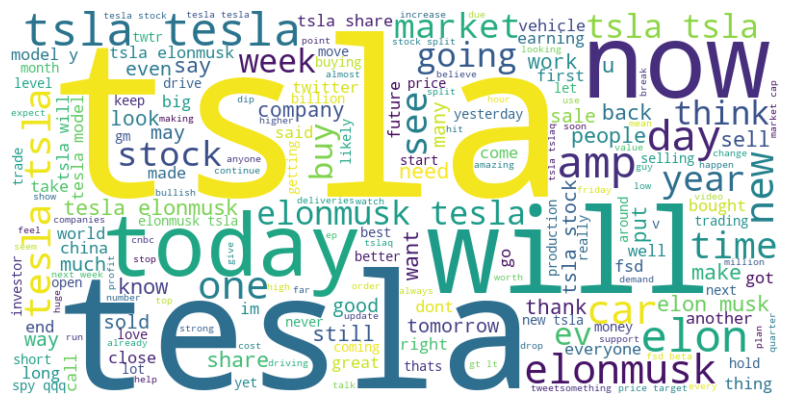

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'tweet' column contains the text data
text_data = ' '.join(train['Tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Bi-Gram Cloud

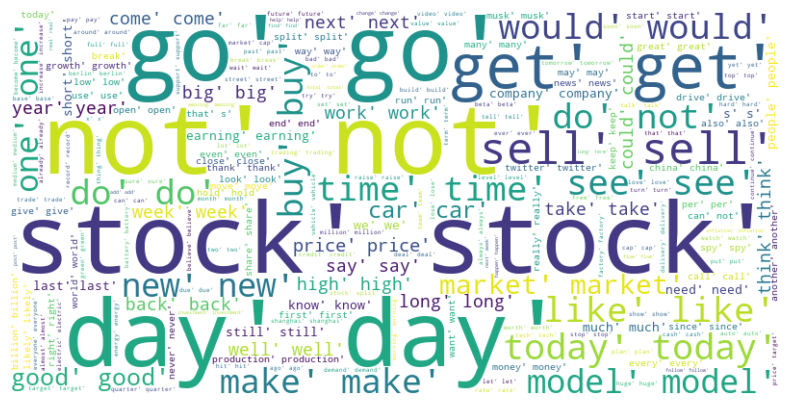

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'bigrams' column contains tuples of bigram phrases
bigram_text = ' '.join([' '.join(map(str, bigrams)) for bigrams in train['bigrams']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

# Display the bigram word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tri-Gram Cloud

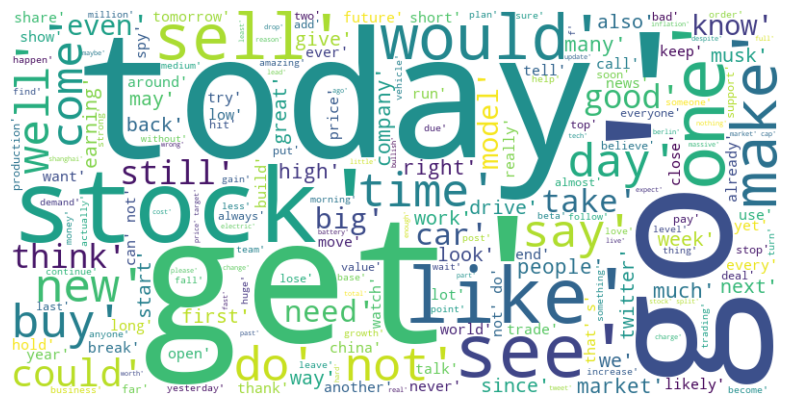

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'trigrams' column contains tuples of trigram phrases
trigram_text = ' '.join([' '.join(map(str, trigrams)) for trigrams in train['trigrams']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trigram_text)

# Display the trigram word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis using VADER

In [79]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming 'tokenized_tweets' is your tokenized tweets column in DataFrame 'df'
# Replace 'df' and 'tokenized_tweets' with your actual DataFrame and column names

# Function to calculate sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Innocent\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [80]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Assuming you have your lemmatized tweets in a column 'lemmatized_tweets' of your DataFrame 'train'

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    # Join the list of lemmatized words into a single string
    text = ' '.join(text)
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the tokenized tweets column and create a new column for sentiment scores
train['sentiment_scores'] = train['lemmatized_tweets'].apply(get_sentiment_scores)

In [81]:
# Extract the compound sentiment score, which is a normalized compound score between -1 (negative) and 1 (positive)
train['compound_score'] = train['sentiment_scores'].apply(lambda x: x['compound'])

In [82]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score
29586,2021-12-01 21:08:24+00:00,teslasolar tesla love my tesla roof,TSLA,"Tesla, Inc.","[TeslaSolar, Tesla]",[],"[love, roof]","[love, roof]","[(love, NOUN), (roof, NOUN)]","[[love, roof]]",[love roof],"[(love, roof)]",[],love roof,"{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...",0.6369
15744,2022-04-12 02:08:42+00:00,tesla fsd beta is able to predict someone wil...,TSLA,"Tesla, Inc.","[elonmusk, WholeMarsBlog, 28delayslater]",[],"[beta, able, predict, someone, cross, street, ...","[beta, able, predict, someone, cross, street, ...","[(beta, ADJ), (able, ADJ), (predict, VERB), (s...","[[cross, street, stop], [zero, intervention, d...","[cross street stop, zero intervention drive]","[(beta, able), (able, predict), (predict, some...","[(beta, able, predict), (able, predict, someon...",beta able predict someone cross street stop av...,"{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...",-0.5267
35945,2021-10-15 15:17:33+00:00,was my preearnings max pain price i think at ...,TSLA,"Tesla, Inc.",[],[],"[pain, price, think, price, solid, earnings, p...","[pain, price, think, price, solid, earning, pr...","[(pain, NOUN), (price, NOUN), (think, VERB), (...","[[pain, price], [price], [price]]","[pain price, price, price]","[(pain, price), (price, think), (think, price)...","[(pain, price, think), (price, think, price), ...",pain price think price solid earning price,"{'neg': 0.333, 'neu': 0.505, 'pos': 0.162, 'co...",-0.4019
31150,2021-11-15 18:10:48+00:00,my remote office is my tesla elonmusk,TSLA,"Tesla, Inc.","[Tesla, elonmusk]",[teslamodel3],"[remote, office]","[remote, office]","[(remote, ADJ), (office, NOUN)]",[[office]],[office],"[(remote, office)]",[],remote office,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
23614,2022-01-23 16:06:47+00:00,expectations for tesla this wednesday you guys...,TSLA,"Tesla, Inc.",[],[Tesla],[excited],[excite],"[(excite, VERB)]",[],[],[],[],excite,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4767
26012,2022-01-03 15:25:13+00:00,okay i need to do something productive besides...,TSLA,"Tesla, Inc.",[],[],"[need, something, productive, besides, stare, ...","[need, something, productive, besides, stare, ...","[(need, VERB), (something, PRON), (productive,...",[[day]],[day],"[(need, something), (something, productive), (...","[(need, something, productive), (something, pr...",need something productive besides stare day,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
24895,2022-01-12 01:06:51+00:00,the only thing i want pradvertising for is to ...,TSLA,"Tesla, Inc.",[elonmusk],[],"[thing, want, build, safety, brand, value, saf...","[thing, want, build, safety, brand, value, saf...","[(thing, NOUN), (want, VERB), (build, VERB), (...","[[thing], [safety, brand, value, safety], [dif...","[thing, safety brand value safety, differentia...","[(thing, want), (want, build), (build, safety)...","[(thing, want, build), (want, build, safety), ...",thing want build safety brand value safety key...,"{'neg': 0.0, 'neu': 0.419, 'pos': 0.581, 'comp...",0.8442
9502,2022-06-04 11:13:19+00:00,a vehicle backlog of about vehicles is of s...,TSLA,"Tesla, Inc.",[],[],"[vehicle, backlog, let, us, forget, higher]","[vehicle, backlog, let, we, forget, high]","[(vehicle, PROPN), (backlog, PROPN), (let, VER...",[],[],"[(vehicle, backlog), (backlog, let), (let, we)...","[(vehicle, backlog, let), (backlog, let, we), ...",vehicle backlog let we forget high,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...",-0.2263
36898,2021-10-05 13:50:38+00:00,great illustration as to why risk management i...,TSLA,"Tesla, Inc.",[],[],"[great, illustration, risk, management, real, ...","[great, illustration, risk, management, real, ...","[(great, ADJ), (illustration, NOUN), (risk, NO...","[[illustration, risk, management, real], [te

# Agglomerative Hierarchical Clustering

In [90]:
import numpy as np

# Assuming you have a DataFrame named 'X' with your data
# Replace 'X' with the actual variable name holding your dataset

# Specify the sample size you want to select
sample_size = 5000

# Generate random indices within the range of your DataFrame's shape
random_indices = np.random.choice(X.shape[0], sample_size, replace=True)

# Use the random indices to select the corresponding rows from your DataFrame
sub_X = X.iloc[random_indices]

# Now, 'sub_X' contains a random subset of rows from your original DataFrame 'X'

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have your sentiment score column as 'sentiment_scores' and TF-IDF matrix in 'X'

# Step 1: Create a linkage matrix using your TF-IDF matrix
linkage_matrix = linkage(sub_X, method='ward')  # You can choose a different linkage method if needed

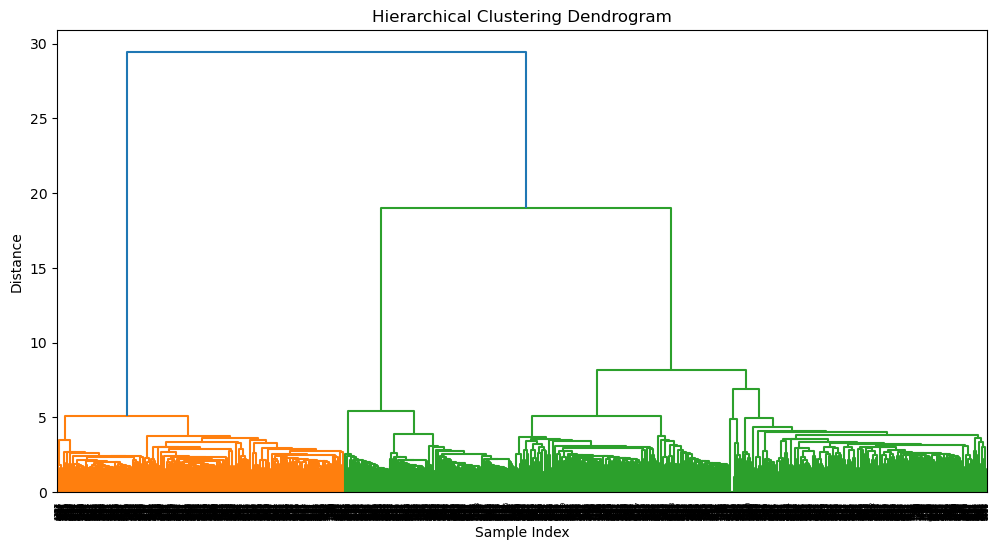

In [92]:
# Step 2: Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, p=30, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [93]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Example: Determine the optimal number of clusters using the dendrogram
max_d = 50  # Set a maximum distance threshold for cutting the dendrogram
optimal_clusters = len(np.unique(fcluster(linkage_matrix, max_d, criterion='distance')))

In [94]:
# Step 4: Perform Hierarchical Clustering with the Optimal Number of Clusters
cluster_assignments = fcluster(linkage_matrix, max_d, criterion='distance')

# Stock Prediction using Sentiment Analysis & Generative Adversarial Network

In [95]:
train['tweets'] = dataset['Tweet']

In [96]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score,tweets
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor...","[medium, job brainwash people today work, catc...","[(medium, do), (do, amazing), (amazing, job), ...","[(medium, do, amazing), (do, amazing, job), (a...",medium do amazing job brainwash people today w...,"{'neg': 0.219, 'neu': 0.614, 'pos': 0.167, 'co...",-0.0516,Mainstream media has done an amazing job at br...
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]],[delivery],"[(delivery, around)]",[],delivery around,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Tesla delivery estimates are at around 364k fr...
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]","[equity, deal, tomorrow, equity]","[(even, include), (include, unvested), (unvest...","[(even, include, unvested), (include, unvested...",even include unvested additional equity x deal...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,3/ Even if I include 63.0M unvested RSUs as of...
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]","[work, ass clown]","[(still, try), (try, stop), (stop, get), (get,...","[(still, try, stop), (try, stop, get), (stop, ...",still try stop get together make something wel...,"{'neg': 0.402, 'neu': 0.502, 'pos': 0.096, 'co...",-0.7717,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]","[derange, man]","[(stop, try), (try, kill), (kill, sad), (sad, ...","[(stop, try, kill), (try, kill, sad), (kill, s...",stop try kill sad derange old man,"{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'comp...",-0.8750,"@RealDanODowd @Tesla Stop trying to kill kids,..."


In [97]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the 'text' column and create new columns for sentiment scores
train['sentiment_scores'] = train['tweets'].apply(get_sentiment_scores)

# Extract the compound sentiment score
train['compound_score'] = train['sentiment_scores'].apply(lambda x: x['compound'])

In [98]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score,tweets
21573,2022-02-08 11:26:11+00:00,this is awesome elonmusk tesla,TSLA,"Tesla, Inc.","[elonmusk, tesla]",[],[awesome],[awesome],"[(awesome, ADJ)]",[],[],[],[],awesome,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.6249,This is awesome 👏 @elonmusk @tesla https://t.c...
32235,2021-11-08 09:12:14+00:00,tesla is the exporter of evs in china with ov...,TSLA,"Tesla, Inc.",[],[1],"[exporter, china, number, company]","[exporter, china, number, company]","[(exporter, NOUN), (china, PROPN), (number, NO...","[[exporter], [number, company]]","[exporter, number company]","[(exporter, china), (china, number), (number, ...","[(exporter, china, number), (china, number, co...",exporter china number company,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp...",0.0772,Tesla is the #1 exporter of EVs in China with ...
20346,2022-02-23 15:09:43+00:00,bought some at tsla,TSLA,"Tesla, Inc.",[],[],[bought],[buy],"[(buy, VERB)]",[],[],[],[],buy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Bought some at $796's. $TSLA
7018,2022-07-08 15:45:51+00:00,opening up tsla superchargers to all evs is a ...,TSLA,"Tesla, Inc.",[],[],"[opening, could, add, importantly, charging, c...","[opening, could, add, importantly, charge, con...","[(opening, NOUN), (could, AUX), (add, VERB), (...","[[opening], [convince], [goodwill]]","[opening, convince, goodwill]","[(opening, could), (could, add), (add, importa...","[(opening, could, add), (could, add, important...",opening could add importantly charge convince ...,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.6997,Opening up $TSLA Superchargers to all EVs is a...
14747,2022-04-20 20:33:46+00:00,tesla spent on advertising during the super b...,TSLA,"Tesla, Inc.","[elonmusk, Tesla]",[Tesla],"[spent, advertising, super, bowl, like, lucid,...","[spend, advertise, super, bowl, like, lucid, p...","[(spend, VERB), (advertise, VERB), (super, ADJ...","[[bowl], [polestar], [million, benefit, end, p...","[bowl, polestar, million benefit end people]","[(spend, advertise), (advertise, super), (supe...","[(spend, advertise, super), (advertise, super,...",spend advertise super bowl like lucid polestar...,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",0.8555,Tesla spent $0 on advertising during the Super...
12476,2022-05-09 15:39:03+00:00,friendly reminder to all the tsla bulls where ...,TSLA,"Tesla, Inc.",[],[],"[friendly, reminder, musk, sell, green, arrow,...","[friendly, reminder, musk, sell, green, arrow,...","[(friendly, ADJ), (reminder, NOUN), (musk, NOU...","[[reminder, musk], [arrow, chart]]","[reminder musk, arrow chart]","[(friendly, reminder), (reminder, musk), (musk...","[(friendly, reminder, musk), (reminder, musk, ...",friendly reminder musk sell green arrow chart ...,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",0.6597,Friendly reminder to all the $TSLA bulls where...
1733,2022-09-06 23:14:34+00:00,only gavinnewsoms policies in ca could devolve...,TSLA,"Tesla, Inc.","[GavinNewsom, Tesla, elonmusk]",[CA],"[ca, could, devolve, back]","[can, could, devolve, back]","[(can, AUX), (could, AUX), (devolve, VERB), (b...",[],[],"[(can, could), (could, devolve), (devolve, back)]","[(can, could, devolve), (could, devolve, back)]",can could devolve back,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Only @GavinNewsom’s policies in #CA could devo...
14359,2022-04-22 14:31:17+00:00,why do not we rename faang to fuked thats what...,TSLA,"Tesla, Inc.",[],[],"[rename, thats, past]","[rename, that, s, past]","[(rename, ADJ), (that, PRON), (s, VERB), (past...",[[past]],[past],"[(rename, that), (that, s), (s, past)]","[(rename, that, s), (that, s, past)]",rename that s past,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Why don't we rename FAANG to FU!KED? That's wh...
22709,2022-01-27 21:44

In [99]:
stock_tweets = train[['Date','compound_score']]

In [100]:
stock_tweets.sample(10)

,Date,compound_score
34222,2021-10-26 11:12:26+00:00,0.0000
27213,2021-12-24 16:40:31+00:00,0.7644
20653,2022-02-19 01:53:05+00:00,-0.7717
12163,2022-05-11 19:59:16+00:00,-0.6486
7554,2022-07-01 03:10:13+00:00,0.6361
29616,2021-12-01 17:47:50+00:00,0.5106
30259,2021-11-23 17:53:01+00:00,0.3788
26655,2021-12-30 04:00:51+00:00,0.0000
25895,2022-01-03 21:06:28+00:00,0.0772
33784,2021-10-28 22:06:50+00:00,0.6784


In [101]:
stock_tweets.shape

(37422, 2)

In [102]:
stock_tweets['Date'] = pd.to_datetime(stock_tweets['Date'])
stock_tweets['Date'] = stock_tweets['Date'].dt.date

In [103]:
stock_tweets.head()

,Date,compound_score
0,2022-09-29,0.0772
1,2022-09-29,0.0000
2,2022-09-29,0.2960
3,2022-09-29,-0.7568
4,2022-09-29,-0.8750


In [104]:
stock_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37422 entries, 0 to 37421
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            37422 non-null  object 
 1   compound_score  37422 non-null  float64
dtypes: float64(1), object(1)
memory usage: 877.1+ KB


In [105]:
twitter_df = stock_tweets.groupby([stock_tweets['Date']]).mean()
print(twitter_df.shape)

(365, 1)


In [106]:
twitter_df.sample(10)

,compound_score
Date,
2021-11-06,0.234560
2022-04-12,0.133509
2022-03-04,0.231325
2021-11-02,0.155453
2021-10-15,0.080318
2022-08-16,0.175093
2022-07-15,0.145201
2022-03-02,0.166595
2021-12-16,0.213682


In [107]:
stocks = pd.read_csv('C:/Users/Innocent/Downloads/stock_yfinance_data.csv')
print(stocks.shape)
stocks.head()

(6300, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [108]:
stock_name = 'TSLA'

In [109]:
stock_df = stocks[stocks['Stock Name'] == stock_name]
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

In [110]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [111]:
stock_df.shape

(252, 8)

In [112]:
final_df = stock_df.join(twitter_df, how="left", on="Date")
final_df = final_df.drop(columns=['Stock Name'])
print(final_df.shape)

(252, 8)


In [113]:
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,compound_score
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.231552
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,0.233704
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,0.135388
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,0.069445
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,0.199940


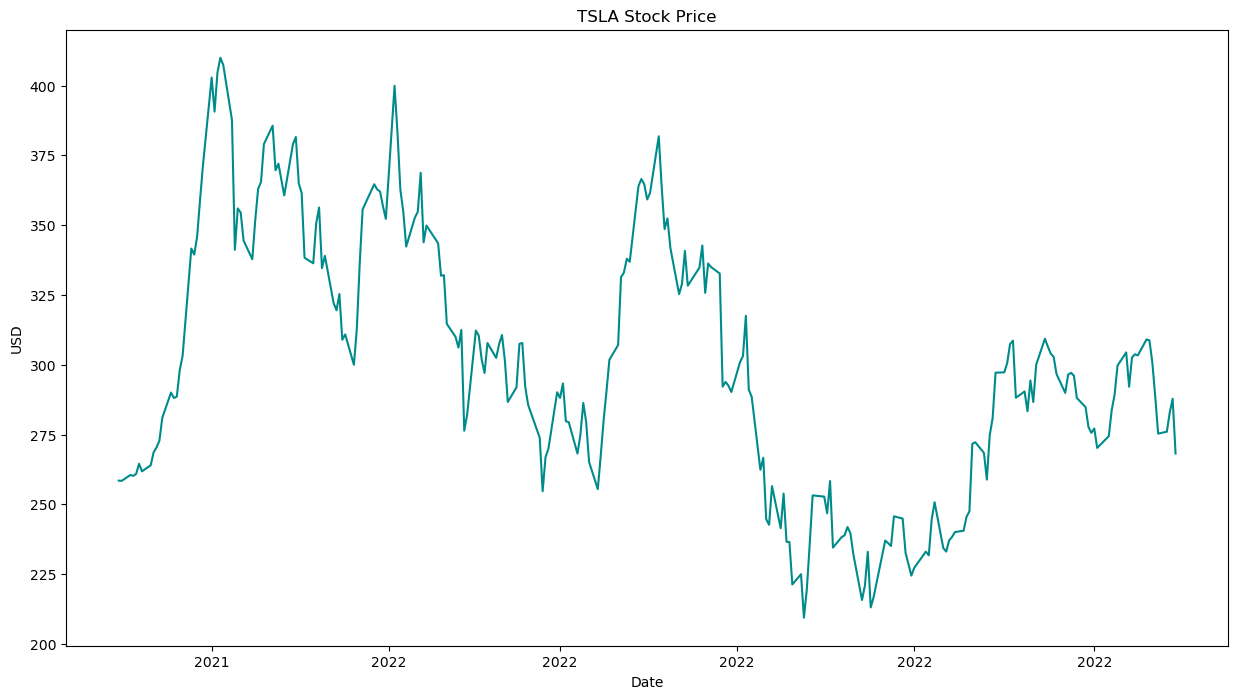

In [114]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter  # Import DateFormatter

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(final_df['Date'], final_df['Close'], color='#008B8B')
ax.set(xlabel="Date", ylabel="USD", title=f"{stock_name} Stock Price")
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.show()

### Adding technical indicators

- MA(7) stans for Moving Average for past 7 days, whereas MA(20) means Moving Average for past 20 days.

- EMA is Exponential Moving average and we can calculate it as:

- EMA_t = Pclose + (EMA_t-1 (100 - P))* Bollinger Bands are calculated as:

- middle line: stdev(MA(20)) upper bound: MA(20) + 2stdev(MA(20)) lower bound: MA(20) - 2stdev(MA(20))



In [115]:
import numpy as np

def get_tech_ind(data):
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean() # Close column
    data['MA20'] = data.iloc[:,4].rolling(window=20).mean() # Close Column

    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12, adjust=False).mean()
    # This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data



In [116]:
tech_df = get_tech_ind(final_df)
dataset = tech_df.iloc[20:,:].reset_index(drop=True)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,compound_score,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2021-10-28,356.103333,360.333344,351.399994,359.013336,359.013336,81639600,0.185287,325.127141,288.855501,-9.269895,32.580099,354.015698,223.695304,353.510805,5.880570
1,2021-10-29,360.619995,371.736664,357.736664,371.333344,371.333344,89755200,0.147279,336.946189,294.501834,-10.609662,36.566908,367.635649,221.368019,365.392497,5.914404
2,2021-11-01,381.666656,403.250000,372.886658,402.863342,402.863342,168146100,0.211234,351.926666,301.619501,-11.860446,42.906989,387.433479,215.805523,390.373061,5.996112
3,2021-11-02,386.453339,402.863342,382.000000,390.666656,390.666656,128213400,0.155453,364.418095,308.143001,-14.295169,46.078655,400.300312,215.985690,390.568791,5.965292
4,2021-11-03,392.443329,405.130005,384.206665,404.619995,404.619995,103885500,0.146942,373.418095,315.328168,-15.716662,49.410503,414.149173,216.507162,399.936260,6.000474


In [117]:
def tech_ind(dataset):
    fig,ax = plt.subplots(figsize=(15, 8), dpi = 200)
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)

    ax.plot(dataset['Date'], dataset['MA7'], label='Moving Average (7 days)', color='g', linestyle='--')
    ax.plot(dataset['Date'], dataset['Close'], label='Closing Price', color='#6A5ACD')
    ax.plot(dataset['Date'], dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.')
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    plt.title('Technical indicators')
    plt.ylabel('Close (USD)')
    plt.xlabel("Year")
    plt.legend()

    plt.show()

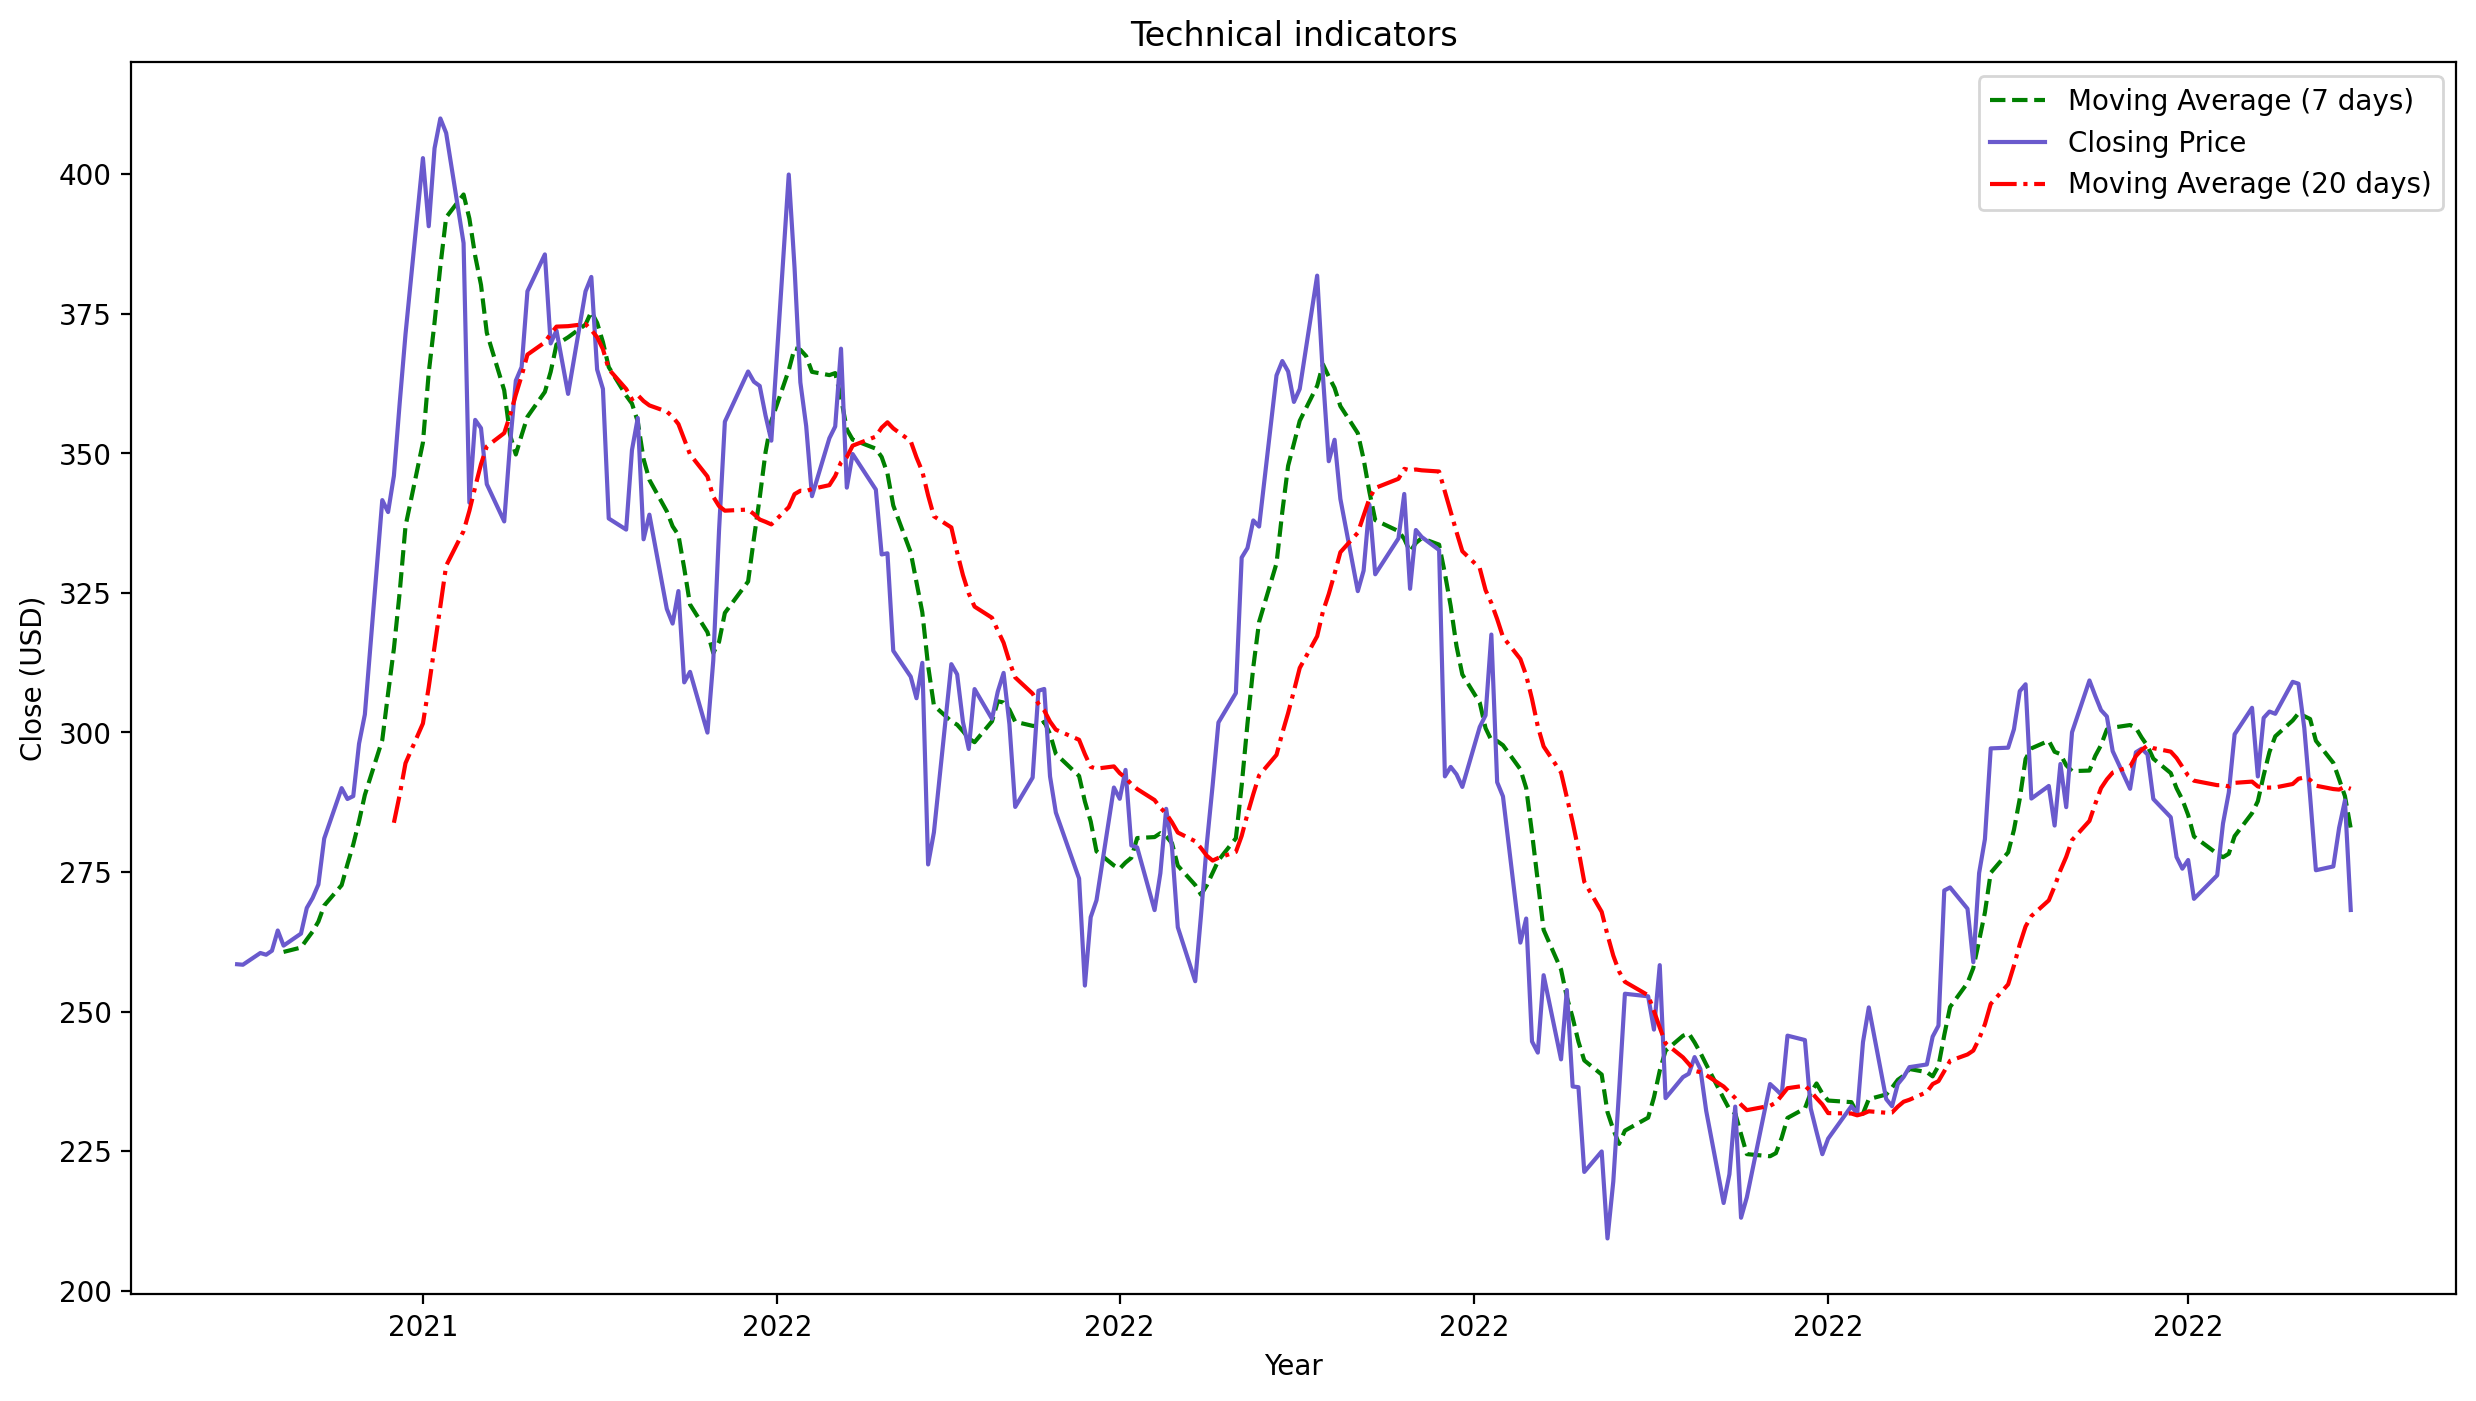

In [118]:
tech_ind(tech_df)

In [119]:
dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill()])

In [120]:
datetime_series = pd.to_datetime(dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='Date')
dataset = dataset.drop(columns='Date')

In [121]:
def normalize_data(df, range, target_column):

    '''
    df: dataframe object
    range: type tuple -> (lower_bound, upper_bound)
        lower_bound: int
        upper_bound: int
    target_column: type str -> should reflect closing price of stock
    '''

    target_df_series = pd.DataFrame(df[target_column])
    data = pd.DataFrame(df.iloc[:, :])

    X_scaler = MinMaxScaler(feature_range=range)
    y_scaler = MinMaxScaler(feature_range=range)
    X_scaler.fit(data)
    y_scaler.fit(target_df_series)

    X_scale_dataset = X_scaler.fit_transform(data)
    y_scale_dataset = y_scaler.fit_transform(target_df_series)
    
    dump(X_scaler, open('X_scaler.pkl', 'wb'))
    dump(y_scaler, open('y_scaler.pkl', 'wb'))

    return (X_scale_dataset,y_scale_dataset)

In [122]:
def batch_data(x_data,y_data, batch_size, predict_period):
    X_batched, y_batched, yc = list(), list(), list()

    for i in range(0,len(x_data),1):
        x_value = x_data[i: i + batch_size][:, :]
        y_value = y_data[i + batch_size: i + batch_size + predict_period][:, 0]
        yc_value = y_data[i: i + batch_size][:, :]
        if len(x_value) == batch_size and len(y_value) == predict_period:
            X_batched.append(x_value)
            y_batched.append(y_value)
            yc.append(yc_value)

    return np.array(X_batched), np.array(y_batched), np.array(yc)

In [123]:
def split_train_test(data):
    train_size = len(data) - 20
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [124]:
def predict_index(dataset, X_train, batch_size, prediction_period):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[batch_size: X_train.shape[0] + batch_size + prediction_period, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + batch_size:, :].index

    return train_predict_index, test_predict_index

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

In [126]:
from sklearn.preprocessing import MinMaxScaler
import pickle  # Import the pickle module

X_scale_dataset,y_scale_dataset = normalize_data(dataset, (-1,1), "Close")
X_batched, y_batched, yc = batch_data(X_scale_dataset, y_scale_dataset, batch_size = 5, predict_period = 1)
print("X shape:", X_batched.shape)
print("y shape:", y_batched.shape)
print("yc shape:", yc.shape)

X_train, X_test, = split_train_test(X_batched)
y_train, y_test, = split_train_test(y_batched)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, 5, 1)

X shape: (227, 5, 15)
y shape: (227, 1)
yc shape: (227, 5, 1)


In [127]:
input_dim = X_train.shape[1] 
feature_size = X_train.shape[2] 
output_dim = y_train.shape[1]

# Build GAN model

In [128]:
def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential([LSTM(units = 1024, return_sequences = True, 
                                    input_shape=(input_dim, feature_size),recurrent_dropout = 0.3),
                               LSTM(units = 512, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 256, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 64, recurrent_dropout = 0.3),
                               Dense(32),
                               Dense(16),
                               Dense(8),
                               Dense(units=output_dim)])
    return model

In [129]:
def make_discriminator_model(input_dim):
    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(8, input_shape=(input_dim+1, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(16, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(32, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=1, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    #cnn_net.add(Flatten())
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net

In [130]:
def discriminator_loss(real_output, fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    real_loss = loss_f(tf.ones_like(real_output), real_output)
    fake_loss = loss_f(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    loss = loss_f(tf.ones_like(fake_output), fake_output)
    return loss

In [131]:
@tf.function

def train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(real_x, training=True)
        generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
        d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
        real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
        d_real_input = tf.concat([real_y_reshape, yc], axis=1)

        real_output = discriminator(d_real_input, training=True)
        fake_output = discriminator(d_fake_input, training=True)

        g_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    g_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    d_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': g_loss}

In [132]:
def train(real_x, real_y, yc, Epochs, generator, discriminator, g_optimizer, d_optimizer, checkpoint = 50):
    train_info = {}
    train_info["discriminator_loss"] = []
    train_info["generator_loss"] = []

    for epoch in tqdm(range(Epochs)):
        real_price, fake_price, loss = train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer)
        G_losses = []
        D_losses = []
        Real_price = []
        Predicted_price = []
        D_losses.append(loss['d_loss'].numpy())
        G_losses.append(loss['g_loss'].numpy())
        Predicted_price.append(fake_price.numpy())
        Real_price.append(real_price.numpy())
#Save model every X checkpoints
        if (epoch + 1) % checkpoint == 0:
            tf.keras.models.save_model(generator, f'./models_gan/{stock_name}/generator_V_%d.h5' % epoch)
            tf.keras.models.save_model(discriminator, f'./models_gan/{stock_name}/discriminator_V_%d.h5' % epoch)
            print('epoch', epoch + 1, 'discriminator_loss', loss['d_loss'].numpy(), 'generator_loss', loss['g_loss'].numpy())
    
        train_info["discriminator_loss"].append(D_losses)
        train_info["generator_loss"].append(G_losses)
  
    Predicted_price = np.array(Predicted_price)
    Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
    Real_price = np.array(Real_price)
    Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])
    plt.subplot(2,1,1)
    plt.plot(train_info["discriminator_loss"], label='Disc_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Discriminator Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(train_info["generator_loss"], label='Gen_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Generator Loss')
    plt.legend()

    plt.show()
    return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(Real_price)

In [133]:
def plot_results(Real_price, Predicted_price, index_train):
    X_scaler = load(open('/content/X_scaler.pkl', 'rb'))
    y_scaler = load(open('/content/y_scaler.pkl', 'rb'))
    train_predict_index = index_train

    rescaled_Real_price = y_scaler.inverse_transform(Real_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
  
    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)
  
    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color = 'r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- Train RMSE -- ', RMSE)

In [134]:
## Test Code

@tf.function 

def eval_op(generator, real_x):
    generated_data = generator(real_x, training = False)

    return generated_data

In [135]:
def plot_test_data(Real_test_price, Predicted_test_price, index_test):
    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = index_test

    rescaled_Real_price = y_scaler.inverse_transform(Real_test_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_test_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=test_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
        real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=test_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)
  
    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('Test RMSE: ', RMSE)
    
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], color='#00008B')
    plt.plot(predict_result["predicted_mean"], color = '#8B0000', linestyle='--')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title(f"Prediction on test data for {stock_name}", fontsize=20)
    plt.show()

In [136]:
learning_rate = 5e-4
epochs = 500

g_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
d_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)


generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
discriminator = make_discriminator_model(X_train.shape[1])

In [137]:
plot_model(generator, to_file='generator_keras_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [138]:
tf.keras.utils.plot_model(discriminator, to_file='discriminator_keras_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


# Train and test model

 10%|████████                                                                         | 50/500 [00:54<06:26,  1.17it/s]

epoch 50 discriminator_loss 1.3925312 generator_loss 0.6959752


 20%|████████████████                                                                | 100/500 [01:32<05:09,  1.29it/s]

epoch 100 discriminator_loss 1.3889079 generator_loss 0.699434


 30%|████████████████████████                                                        | 150/500 [02:09<04:29,  1.30it/s]

epoch 150 discriminator_loss 1.3940386 generator_loss 0.6818029


 40%|████████████████████████████████                                                | 200/500 [02:46<03:51,  1.29it/s]

epoch 200 discriminator_loss 1.3861516 generator_loss 0.69784075


 50%|████████████████████████████████████████                                        | 250/500 [03:24<03:13,  1.29it/s]

epoch 250 discriminator_loss 1.3865167 generator_loss 0.67683643


 60%|████████████████████████████████████████████████                                | 300/500 [04:02<02:41,  1.24it/s]

epoch 300 discriminator_loss 1.3874978 generator_loss 0.70564735


 70%|████████████████████████████████████████████████████████                        | 350/500 [04:40<01:55,  1.30it/s]

epoch 350 discriminator_loss 1.3858197 generator_loss 0.6967357


 80%|████████████████████████████████████████████████████████████████                | 400/500 [05:17<01:17,  1.30it/s]

epoch 400 discriminator_loss 1.3867636 generator_loss 0.70363474


 90%|████████████████████████████████████████████████████████████████████████        | 450/500 [05:54<00:41,  1.22it/s]

epoch 450 discriminator_loss 1.386187 generator_loss 0.6901852


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [06:32<00:00,  1.28it/s]


epoch 500 discriminator_loss 1.3928051 generator_loss 0.7738972


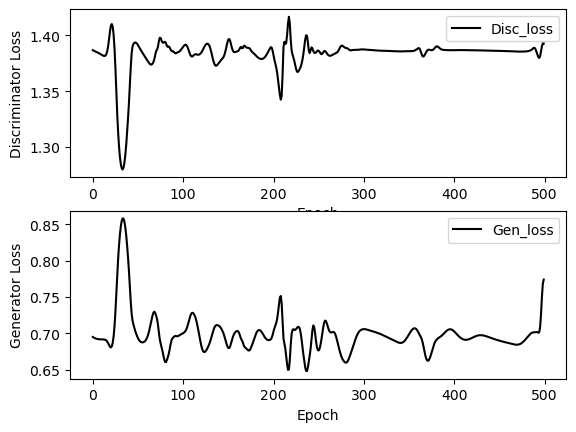

In [139]:
predicted_price, real_price, RMSPE = train(X_train, y_train, yc_train, epochs, generator, discriminator, g_optimizer, d_optimizer)

In [140]:
test_generator = tf.keras.models.load_model(f'./models_gan/{stock_name}/generator_V_{epochs-1}.h5')

Test RMSE:  12.025466377067735


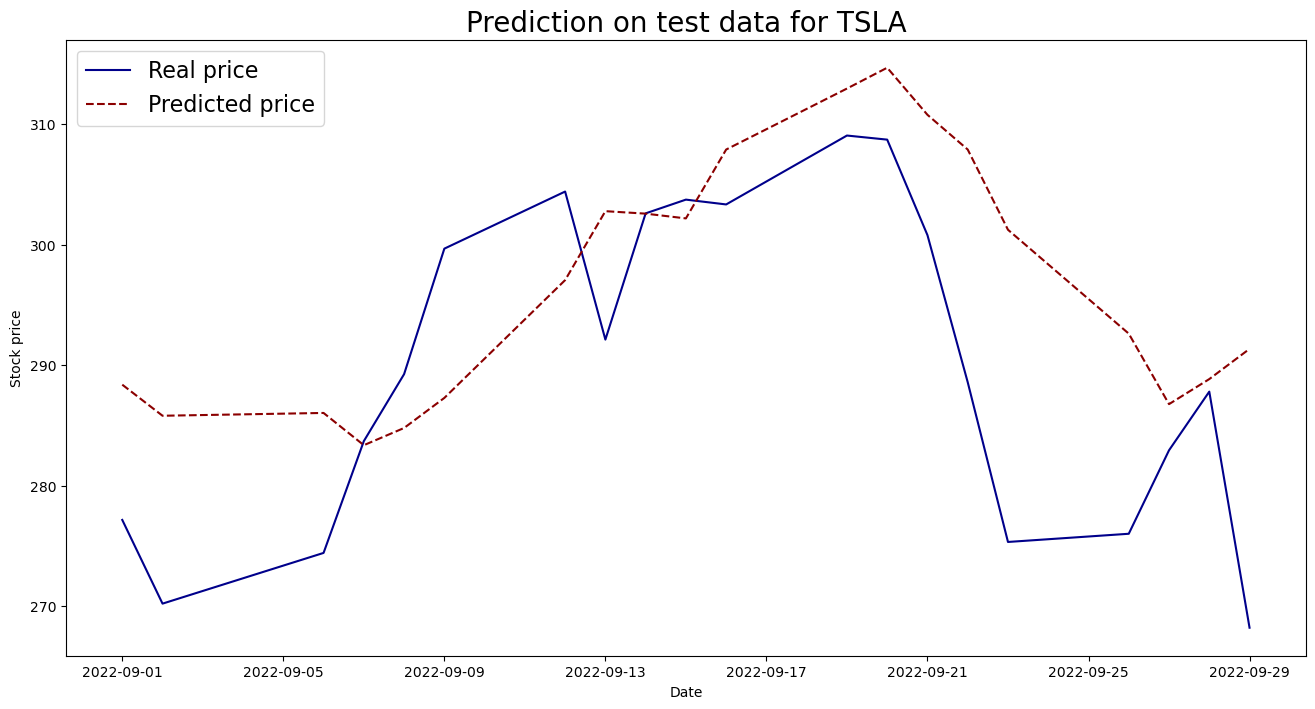

In [141]:
predicted_test_data = eval_op(test_generator, X_test)
plot_test_data(y_test, predicted_test_data,index_test)